#Insurance Claims Charges Prediction

In [1]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-04-19 08:14:31--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.01s   

2024-04-19 08:14:31 (4.97 MB/s) - ‘insurance.csv’ saved [55628/55628]



]
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
--2024-04-13 10:15:38--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.01s   

2024-04-13 10:15:38 (4.82 MB/s) - ‘insurance.csv’ saved [55628/55628]


##STEP-1: Importing Libraries & Data Set

In [2]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns

In [3]:
# Read the Data
data=pd.read_csv('insurance.csv')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
# Info about the shape of data, type of individual columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We have integers, floats and objects, and luckily no null values.

##STEP-2:Exploratory Data Analysis (EDA)

In [5]:
# Descriptive stats

# Print no.of rows and columns
print("Shape of given dataset=",data.shape)

# Calculates Mean charges for Male  and Female
f=np.mean(data[data["sex"]=='female']["charges"])
print("Average charges for Female=",f)

m=np.mean(data[data["sex"]=='male']["charges"])
print("Average charges for Male=",m)
print('\n')
print("Description of the given Data set:\n")
data.describe()

Shape of given dataset= (1338, 7)
Average charges for Female= 12569.578843835347
Average charges for Male= 13956.751177721893


Description of the given Data set:



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


It looks like everything is within acceptable ranges. For example, age is between 18 and 64, which makes sense given that this is a dataset of adults on a commercial insurance plan.

In [6]:
# Null check
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


There are no null values in the Given Dataset.

In [7]:
# Print name of columns
print(data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Next, we check the head (top 5 rows) of the dataset.

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Let's move on to create a pairs plot. This plots, pairwise relationships in a dataset, and is a great method to identify trends for follow-up analysis.

# Visulizations

<Figure size 1400x800 with 0 Axes>

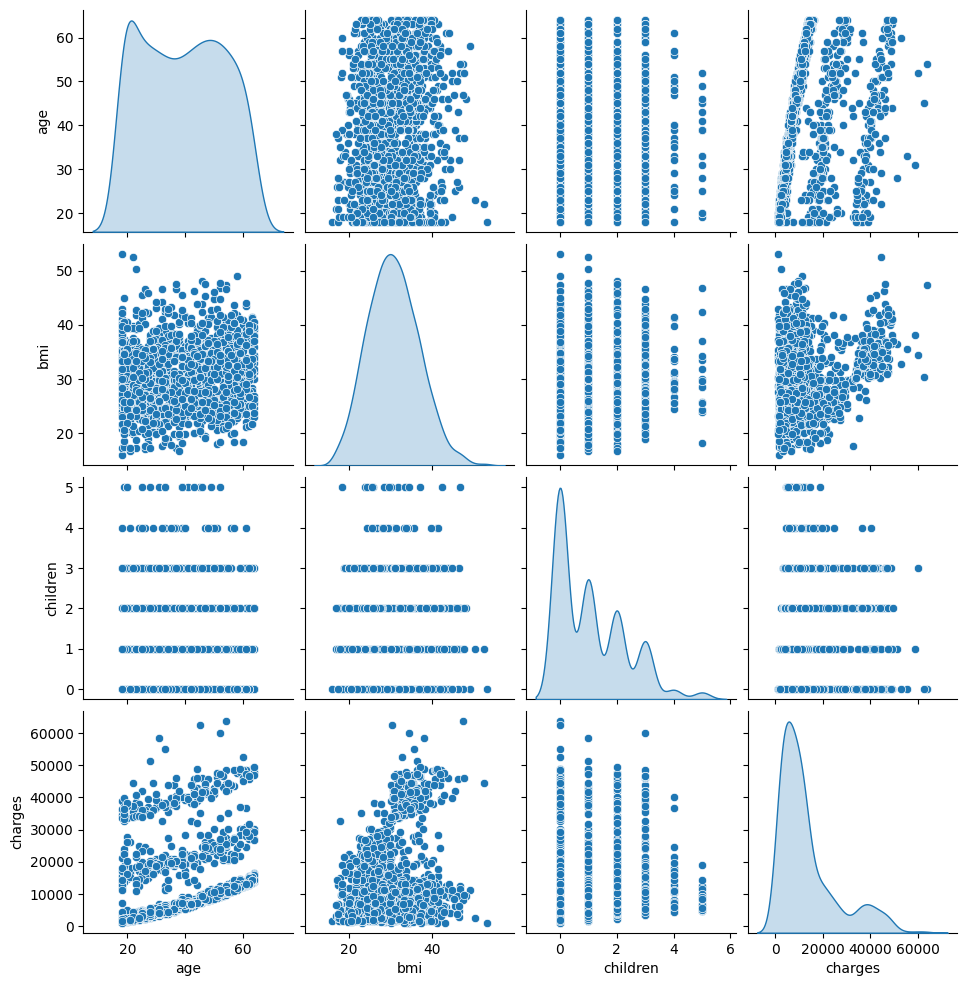

In [9]:
plt.figure(figsize = (14, 8))
sns.pairplot(data=data, diag_kind = 'kde')

By default, this function will create a grid of axes such that each variable in our dataset will be shared in the y-axis across a single row and in the x-axis across a single column. The diagonal axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column. Fortunately seaborn gives us an easy way to implement the pairs plot.

Based on these patterns, age seems to be an interesting feature to start our exploration with. Let's visualize the ages of the members. We will add a Kernel Density Estimator (KDE) to our histogram. The KDE is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

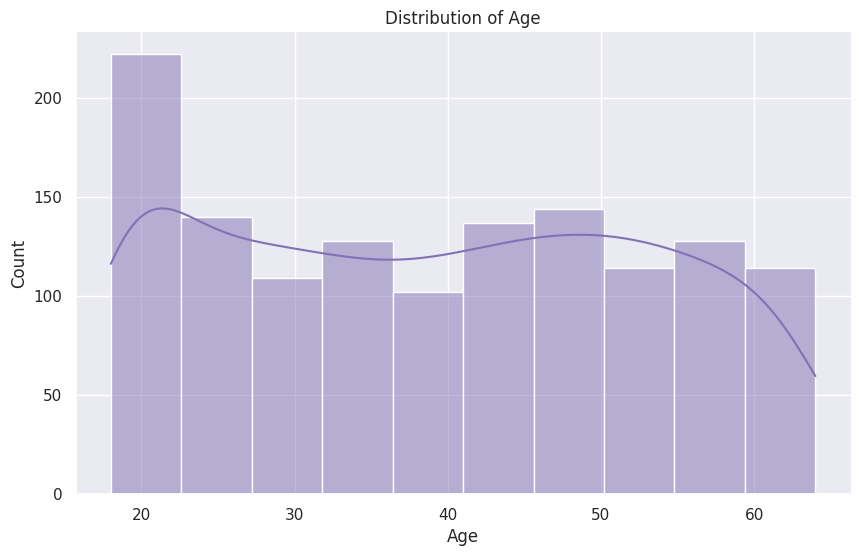

In [10]:
plt.figure(figsize = (10, 6))
sns.set(style="darkgrid", palette="deep", color_codes=True)
sns.histplot(data['age'], bins = 10, color = 'm', kde = True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
# Remove top and right spines
sns.despine()
plt.show()

Lets also create a scatter plot to check the relationship between age and charges using a bar graph.

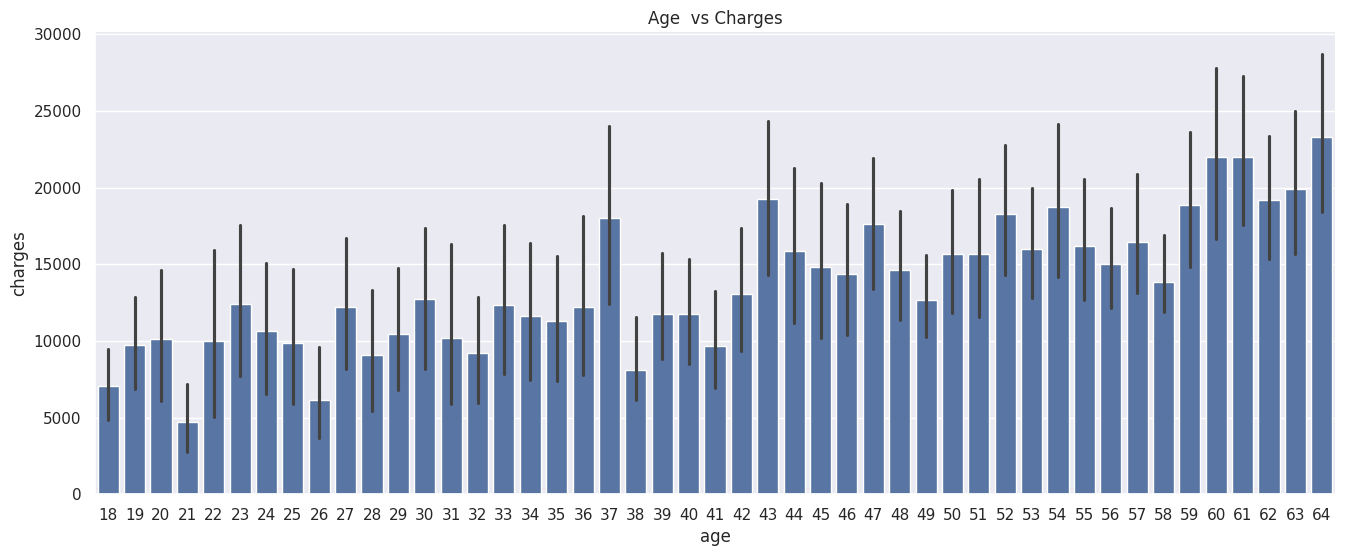

In [11]:
# Age vs Charges
plt.figure(figsize=(16,6))
sns.barplot(x = 'age', y = 'charges' , data = data)
plt.title("Age  vs Charges")
sns.despine()



*   As expected, charges go up with age.More the age more the charges will be.
*   At certain ages, the charges spike, like at age 22 and 27. We hypothesize that at 22 many people get their first job and consequently their first insurance plan, and at 27 those who remained on their parents plan were forced to buy their own, since the ACA allows children to be on their parents' plans until age 26.



Now we can see how the number of children impact on charges using box and whisker plots.

First we can see the distribution of the number of children using a count plot.

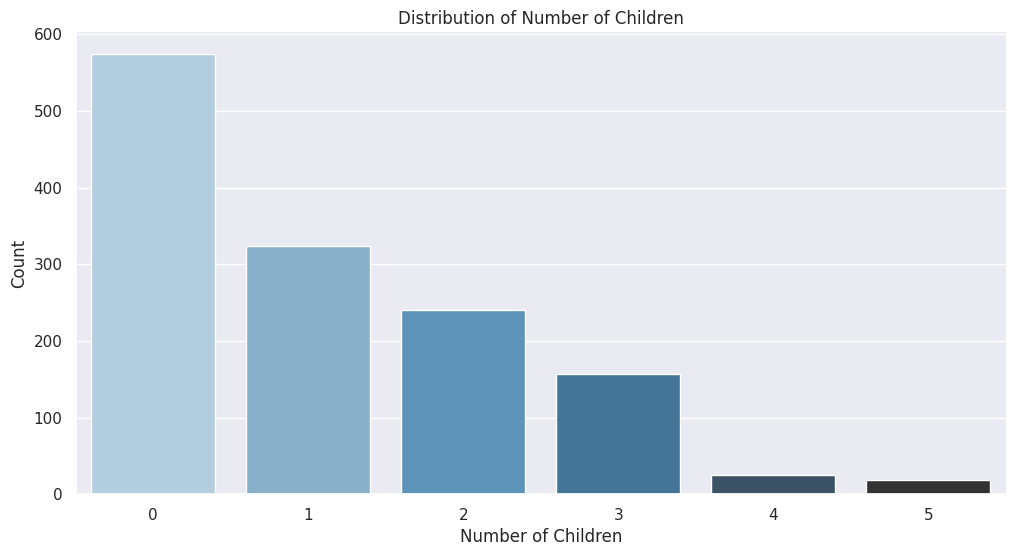

In [12]:
plt.figure(figsize = (12, 6))

sns.countplot(x=data['children'], hue=data['children'], palette='Blues_d', legend=False).set_title('Distribution of Number of Children')

plt.xlabel('Number of Children')
plt.ylabel('Count')
sns.despine()
plt.show()

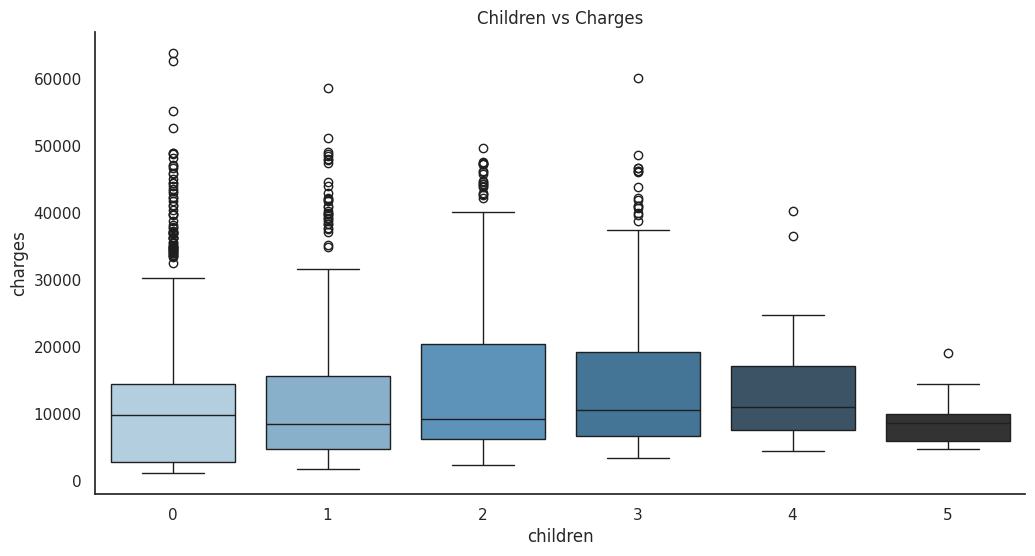

In [13]:
# Children vs Charges
sns.set_style("white")
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'children',hue='children',y = 'charges', data = data, palette ='Blues_d',legend=False)
plt.title('Children vs Charges')
sns.despine()

The number of children a member has an interesting impact on charges based on this plot: those with 2 or 3 kids have slightly higher charges than those with 0-1 or 4-5 kids. Next, lets take a look at gender using a pie chart.

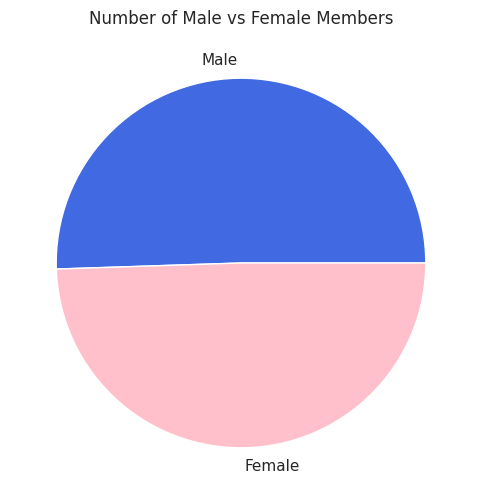

In [14]:
colors=['royalblue','pink']
labels='Male','Female'
size=(data['sex'].value_counts())
plt.figure(figsize=(6,6))
plt.pie(size,data=data,colors=colors,labels=labels)
plt.title('Number of Male vs Female Members')
plt.show()


There are about the same number of males and females in this dataset.

Lets see how gender affects charges using a violin plot. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high.

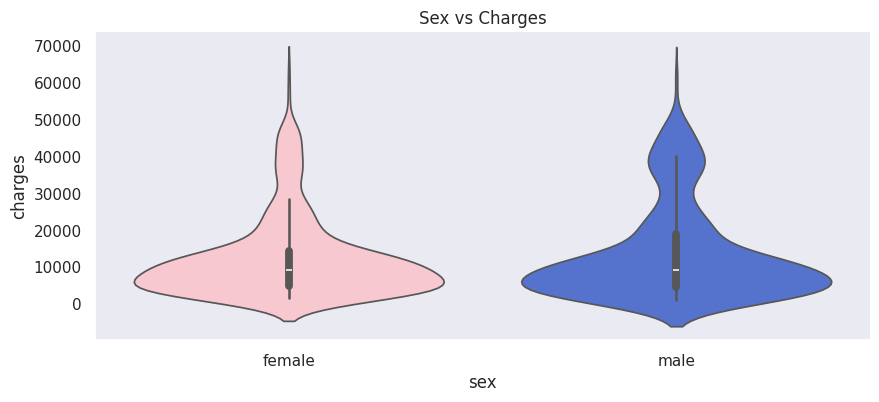

In [15]:
# Sex vs Charges
sns.set_style("dark")
colors=['Pink','royalblue']
plt.figure(figsize=(10,4))
sns.violinplot(x='sex' , hue= 'sex', y = 'charges' , data =data , palette =colors , orient = 'v', legend=False)
plt.title('Sex vs Charges')
sns.despine()

From the upper end of the violin plot we see that in general, males insurance charges more than females.


Now we can filter by smoking status.First lets see how many members smoke using a pie chart.

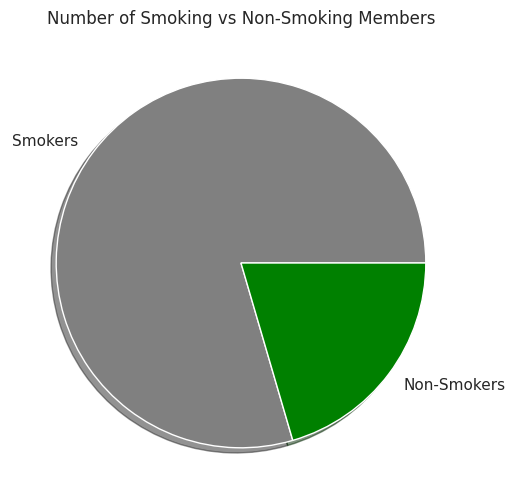

In [16]:
# Smokers vs Non-Smokers
colors=['gray','green']
labels='Smokers','Non-Smokers'
size=(data['smoker'].value_counts())
plt.figure(figsize=(6,6))
plt.pie(size, colors=colors,labels=labels,shadow=True)
plt.title("Number of Smoking vs Non-Smoking Members")
plt.show()

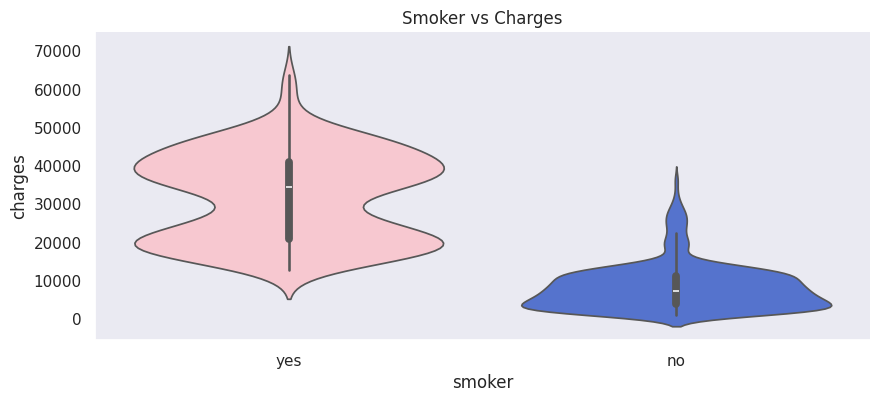

In [17]:
# Smoker vs Charges
sns.set_style("dark")
colors=['Pink','royalblue']
plt.figure(figsize=(10,4))
sns.violinplot(x='smoker' , hue= 'smoker', y = 'charges' , data =data , palette =colors , orient = 'v', legend=False)
plt.title('Smoker vs Charges')
sns.despine()

Smokers tend to have a wider range of healthcare charges compared to non-smokers, as evidenced by the broader spread of the violin plot for smokers. The median charge for smokers appears to be higher than for non-smokers, indicated by the position of the white dot within each violin plot.

Now we can visualize the regions to which member belongs

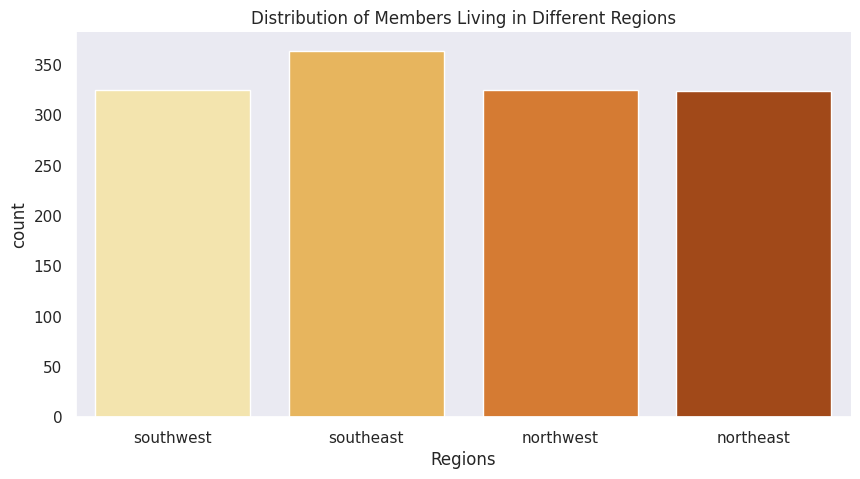

In [18]:
plt.figure(figsize = (10, 5))
sns.countplot(data=data,x='region',hue='region', palette='YlOrBr')
plt.title('Distribution of Members Living in Different Regions')
plt.xlabel('Regions')
plt.ylabel('count')
sns.despine()

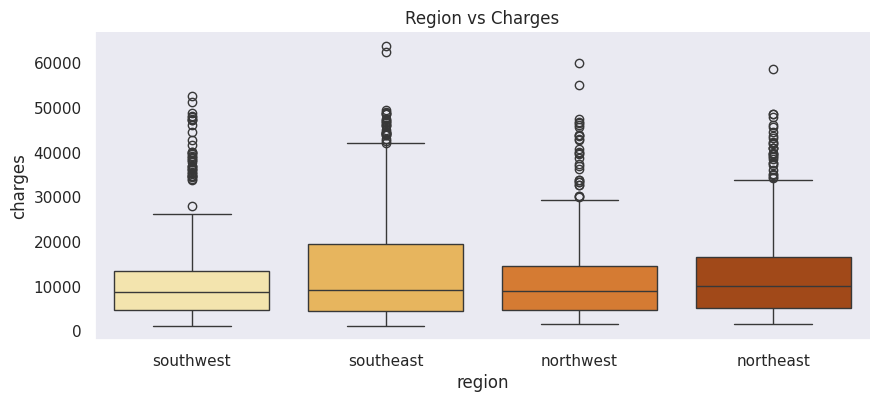

In [19]:
# Region vs Charges
plt.figure(figsize=(10,4))
sns.boxplot(data=data,x='region',y='charges',hue='region',palette='YlOrBr')
plt.title("Region vs Charges")
sns.despine()

From this plot we can see that members in the Southeast region have relatively higher charges than others. But region actually does not play any role in determining the insurance charges.

Finally, we will display the correlation plot or heatmap for the dataset. Seaborn offers a convenient way to plot rectangular data as a color-encoded matrix. However, in order to get the full picture of our dataset, we first need to convert a couple of the categorical variables to numeric variables: sex and smoker.

In [20]:
data2=data.copy()
data2['male'] = data2['sex'].replace('female', 0)
data2['male'] = data2['male'].replace('male', 1)

data2['smoker'].replace('no', 0, inplace=True)
data2['smoker'].replace('yes', 1, inplace=True)
# Get the columns of the modified dataset 'data2'
data2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'male'], dtype='object')

In [21]:
data2

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,1,southwest,16884.92400,0
1,18,male,33.770,1,0,southeast,1725.55230,1
2,28,male,33.000,3,0,southeast,4449.46200,1
3,33,male,22.705,0,0,northwest,21984.47061,1
4,32,male,28.880,0,0,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,1
1334,18,female,31.920,0,0,northeast,2205.98080,0
1335,18,female,36.850,0,0,southeast,1629.83350,0
1336,21,female,25.800,0,0,southwest,2007.94500,0


In [22]:
data2.drop(['sex'],axis=1,inplace=True)
data2.drop(['region'],axis=1,inplace=True)

data2.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'male'], dtype='object')

<Axes: >

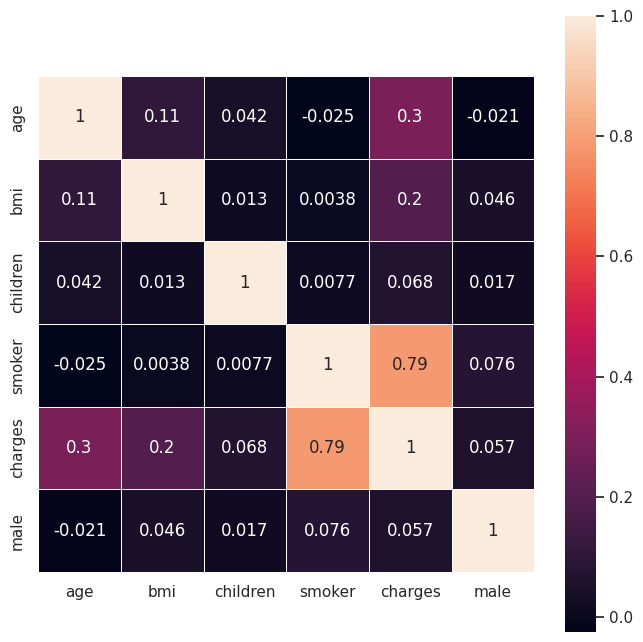

In [23]:
# Plotting the correlation plot for the dataset
f, ax = plt.subplots(figsize = (8,8))
corr = data2.corr()
ax.set_ylim(-1.5,2.5)
sns.heatmap(corr, linewidths=.5, annot=True, square = True, ax = ax)

In conclusion, based on our EDA and reiterated through our final correlation plot, it appears that smoking is the most correlated with charges among these variables. It is followed by age, BMI, number of children and then sex.

# STEP-3:Data Preprocessing / Clean the Data

In [24]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
# Create a copy of the data
data3 = data.copy()

In [26]:
# Label Encoding for sex and smoker(converts categorical values into numerical)

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'sex' column
data3['sex_encoded'] = label_encoder.fit_transform(data3['sex'])

# Encode 'smoker' column
data3['smoker_encoded'] = label_encoder.fit_transform(data3['smoker'])

# Print the encoded columns
print(data3[['sex', 'sex_encoded', 'smoker', 'smoker_encoded']].head())


      sex  sex_encoded smoker  smoker_encoded
0  female            0    yes               1
1    male            1     no               0
2    male            1     no               0
3    male            1     no               0
4    male            1     no               0


Since, region does not play any role in determining the insurance charges. We can remove the particular column from our dataset.

In [27]:
# Removing unnecassary columns from the dataset
data3.drop(['region','sex','smoker'],axis=1,inplace=True)
data3.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_encoded', 'smoker_encoded'], dtype='object')

In [28]:
# Selecting Independent (Features) & Dependent(Target) variables
y=data3[['charges']]
X=data3.drop(['charges'],axis=1)

In [29]:
X

,age,bmi,children,sex_encoded,smoker_encoded
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [30]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


# Splitting the dataset into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [32]:
print(X_train.head())

      age    bmi  children  sex_encoded  smoker_encoded
560    46  19.95         2            0               0
1285   47  24.32         0            0               0
1142   52  24.86         0            0               0
969    39  34.32         5            0               0
486    54  21.47         3            0               0


In [33]:
print(X_test.head())

      age     bmi  children  sex_encoded  smoker_encoded
764    45  25.175         2            0               0
887    36  30.020         0            0               0
890    64  26.885         0            0               1
1293   46  25.745         3            1               0
259    19  31.920         0            1               1


In [34]:
print(y_train[:10])

          charges
560    9193.83850
1285   8534.67180
1142  27117.99378
969    8596.82780
486   12475.35130
170   13405.39030
277    2150.46900
1033  13747.87235
209    6610.10970
947   39047.28500


In [35]:
print(y_test[:10])

          charges
764    9095.06825
887    5272.17580
890   29330.98315
1293   9301.89355
259   33750.29180
1312   4536.25900
899    2117.33885
752   14210.53595
1286   3732.62510
707   10264.44210


# STEP-4 : Fit the Model & Predict , check the Accuracy

# Linear Regression

Fitting Simple Linear Regression to the Training set

From Sklearn, I’ve imported the linear_model, so I can run a linear regression.

Now we’ll fit the model on the training data:

In [36]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [37]:
X_train

,age,bmi,children,sex_encoded,smoker_encoded
560,46,19.950,2,0,0
1285,47,24.320,0,0,0
1142,52,24.860,0,0,0
969,39,34.320,5,0,0
486,54,21.470,3,0,0
...,...,...,...,...,...
1095,18,31.350,4,0,0
1130,39,23.870,5,0,0
1294,58,25.175,0,1,0
860,37,47.600,2,0,1


In [38]:
# Predicting the test set results
y_pred=regressor.predict(X_test)
y_pred_train=regressor.predict(X_train)

In [39]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# Calculate mean squared error
mse=mean_squared_error(y_test,y_pred)

# Calculate Root mean squared error
rmse=np.sqrt(mse)

# Print mean squared error
print("Mean Squared Error=", mse)

# Print root mean squared error
print("Root Mean Squared Error=",rmse)

# Print model score
print("Model Score=",regressor.score(X_test,y_test))

# Print R square score
print("R square score", r2_score(y_test,y_pred))

Mean Squared Error= 33979257.05080821
Root Mean Squared Error= 5829.17293025419
Model Score= 0.7811302113434095
R square score 0.7811302113434095


78.9% accuracy! Not that bad for the first model! Now let's try Polynomial regression

Polynomial regression

A form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial.(curvilinear relationship) Why polynomial regression? An assumption in usual multiple linear regression analysis is that all the independent variables are independent. In polynomial regression model, this assumption is not satisfied.

In [40]:
df=data3.copy()
y=df['charges']
X=df.drop(['charges'],axis=1)

In [41]:
X.head()

,age,bmi,children,sex_encoded,smoker_encoded
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.2,random_state=42)
lin_reg=LinearRegression()
lin_reg=lin_reg.fit(X_train,y_train)
print(lin_reg.score(X_test,y_test))

0.8669441556658781


86.6% accuracy. Sweet! We see a huge improvement in the score!

# Support Vector Machine

In [44]:
y=data3['charges']
x=data3.drop(['charges'],axis=1)

In [45]:
x.head()

,age,bmi,children,sex_encoded,smoker_encoded
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


In [46]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Splitting the dataset into training and test set

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)


In [48]:
print(x_train.head())

      age     bmi  children  sex_encoded  smoker_encoded
1163   18  28.215         0            0               0
196    39  32.800         0            0               0
438    52  46.750         5            0               0
183    44  26.410         0            0               0
1298   33  27.455         2            1               0


In [49]:
print(x_test.head())

      age     bmi  children  sex_encoded  smoker_encoded
578    52  30.200         1            1               0
610    47  29.370         1            0               0
569    48  40.565         2            1               1
1034   61  38.380         0            1               0
198    51  18.050         0            0               0


In [50]:
print(y_train[:10])

1163     2200.83085
196      5649.71500
438     12592.53450
183      7419.47790
1298     5261.46945
472      1744.46500
1139    36898.73308
642     13143.86485
729      6781.35420
1322    12981.34570
Name: charges, dtype: float64


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train) # apply on whole x data
x_test=scaler.transform(x_test)

# Build model

In [52]:
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_lin.fit(x_train,y_train)

SVR(C=100, gamma='auto', kernel='linear')

In [53]:
y_pred= svr_lin.predict(x_test)

# Evaluate model

In [54]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# Calculate mean squared error
mse=mean_squared_error(y_test,y_pred)

# Calculate Root mean squared error
rmse=np.sqrt(mse)

# Print mean squared error
print("Mean Squared Error=", mse)

# Print root mean squared error
print("Root Mean Squared Error=",rmse)

# Print model score
print("Model Score=",svr_lin.score(x_test,y_test))

# Print R square score
print("R square score", r2_score(y_test,y_pred))

Mean Squared Error= 59182421.79540412
Root Mean Squared Error= 7693.011230682308
Model Score= 0.6288792857320358
R square score 0.6288792857320358


62.88% accuracy

# Evaluate rbf Model

In [55]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(x_train,y_train)
y_pred_rbf= svr_rbf.predict(x_test)

In [56]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# Calculate mean squared error
mse=mean_squared_error(y_test,y_pred_rbf)

# Calculate Root mean squared error
rmse=np.sqrt(mse)

# Print mean squared error
print("Mean Squared Error=", mse)

# Print root mean squared error
print("Root Mean Squared Error=",rmse)

# Print model score
print("Model Score=",svr_rbf.score(x_test,y_test))

# Print R square score
print("R square score", r2_score(y_test,y_pred_rbf))


Mean Squared Error= 101198837.29843894
Root Mean Squared Error= 10059.763282425632
Model Score= 0.3654030429656955
R square score 0.3654030429656955


36.54 accuracy

# Decision Tree

Importing The libraries

In [57]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

In [58]:
y=data3['charges']
x=data3.drop(['charges'],axis=1)

In [59]:
print(x.head())

   age     bmi  children  sex_encoded  smoker_encoded
0   19  27.900         0            0               1
1   18  33.770         1            1               0
2   28  33.000         3            1               0
3   33  22.705         0            1               0
4   32  28.880         0            1               0


In [60]:
print(y.head())

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)


In [62]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)


In [63]:
from sklearn.tree import DecisionTreeRegressor
re = DecisionTreeRegressor()
re.fit(x_train, y_train)

DecisionTreeRegressor()

In [64]:
y_pred= re.predict(x_test)

In [65]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# Calculate mean squared error
mse=mean_squared_error(y_test,y_pred)

# Calculate Root mean squared error
rmse=np.sqrt(mse)

# Print mean squared error
print("Mean Squared Error=", mse)

# Print root mean squared error
print("Root Mean Squared Error=",rmse)

# Print model score
print("Model Score=",re.score(x_test,y_test))

# Print R square score
print("R square score", r2_score(y_test,y_pred))

Mean Squared Error= 49018258.922546096
Root Mean Squared Error= 7001.304087278748
Model Score= 0.6926166467739917
R square score 0.6926166467739917


70.7% accuracy

# Random Forest

In [66]:
data3

,age,bmi,children,charges,sex_encoded,smoker_encoded
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [67]:
y=data3['charges']
x=data3.drop(['charges'],axis=1)

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [70]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(random_state=0)
reg.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [71]:
y_pred=reg.predict(x_test)

In [72]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# Calculate mean squared error
mse=mean_squared_error(y_test,y_pred)

# Calculate Root mean squared error
rmse=np.sqrt(mse)

# Print mean squared error
print("Mean Squared Error=", mse)

# Print root mean squared error
print("Root Mean Squared Error=",rmse)

# Print model score
print("Model Score=",reg.score(x_test,y_test))

# Print R square score
print("R square score", r2_score(y_test,y_pred))

Mean Squared Error= 23174468.718682997
Root Mean Squared Error= 4813.986780069405
Model Score= 0.8546777045827801
R square score 0.8546777045827801


85.46% accuracy

# Model Scores:

    Linear Regression:      78.9%

    Polynomial Regression:  86.6%

    Support vector machine: 62.8%

    Decision Tree:          53.2%

    Random Forest:          85.46%

From the above results we can conclude that the best model is Polynomial Regression with 86.6% accuracy then followed by Random forest model with 85.4% accuracy.